In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)
from plotting_utils import *

In [2]:
input_folder = "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/reco_regression_pfthresholds_studies/electrons_genmatching"
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_noise235fb_UL18thresh_v1/electrons_V2/gen_matching"
os.makedirs(output_folder, exist_ok=True)

In [ ]:
df_1 = pd.HDFStore(f"{input_folder}/DeepSC_algoA_235noise_UL18_v6.h5py", "r")["df"]
df_2 = pd.HDFStore(f"{input_folder}/Mustache_235noise_UL18_v6.h5py", "r")["df"]
df_1.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df_2.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df_1 = df_1.iloc[:-1]
df_2 = df_2.iloc[:-1]

In [ ]:
dfj = df_1.merge(df_2, on=["runId","eventId","genpart_index"], suffixes=["_M", "_D"],indicator=True, how="inner", sort=False)

In [5]:
dfj.columns

Index(['genpart_index', 'elematched_M', 'ele_index_M', 'calomatched_M',
       'caloindex_M', 'sc_matched_M', 'sc_index_M', 'seed_index_M',
       'en_seed_M', 'et_seed_M',
       ...
       'genpart_en_D', 'genpart_et_D', 'genpart_eta_D', 'genpart_phi_D',
       'genpart_pt_D', 'nVtx_D', 'rho_D', 'obsPU_D', 'truePU_D', '_merge'],
      dtype='object', length=132)

In [6]:
dfj

,genpart_index,elematched_M,ele_index_M,calomatched_M,caloindex_M,sc_matched_M,sc_index_M,seed_index_M,en_seed_M,et_seed_M,...,genpart_en_D,genpart_et_D,genpart_eta_D,genpart_phi_D,genpart_pt_D,nVtx_D,rho_D,obsPU_D,truePU_D,_merge
0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,0.0,2767.763428,440.406967,...,2672.030762,428.492086,-2.516977,-0.785843,428.492096,39.0,19.193069,26.0,33.029861,both
1,1.0,1.0,2.0,1.0,2.0,1.0,0.0,3.0,270.391479,268.937858,...,270.484985,269.468851,-0.086816,2.162129,269.468842,39.0,19.193069,26.0,33.029861,both
2,2.0,0.0,-999.0,1.0,1.0,1.0,1.0,4.0,209.091431,208.996541,...,208.980194,208.751455,0.046809,0.361830,208.751450,39.0,19.193069,26.0,33.029861,both
3,3.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0,1302.607300,332.894590,...,1323.253296,335.234863,2.049718,-2.291374,335.234863,39.0,19.193069,26.0,33.029861,both
4,0.0,1.0,0.0,1.0,3.0,1.0,2.0,0.0,563.978271,223.110433,...,1023.968811,404.314542,-1.580920,0.953701,404.314545,41.0,15.648993,30.0,35.640633,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163899,3.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,3519.881836,430.627457,...,3384.436523,407.414064,2.806617,0.587457,407.414062,72.0,35.126030,49.0,46.856838,both
2163900,0.0,1.0,0.0,1.0,3.0,1.0,5.0,0.0,1564.436279,462.460968,...,1619.977173,484.180070,-1.877738,1.114115,484.180054,53.0,30.902176,51.0,43.894489,both
2163901,1.0,1.0,1.0,1.0,2.0,1.0,0.0,3.0,329.723114,302.785738,...,330.121124,306.751593,-0.387907,-1.886777,306.751587,53.0,30.902176,51.0,43.894489,both
2163902,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,339.606293,216.120329,...,452.603699,283.484901,1.044217,0.171521,283.484894,53.0,30.902176,51.0,43.894489,both


# SC matching

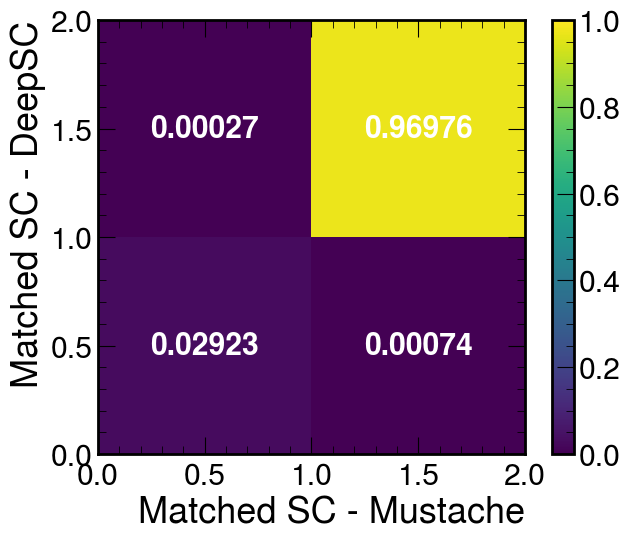

In [7]:
fig = plt.figure(figsize=(7,6))
ax = plt.gca()

hist, xbins, ybins = np.histogram2d(dfj.sc_matched_M, dfj.sc_matched_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
C = ax.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax)
ax.set_xlabel("Matched SC - Mustache")
ax.set_ylabel("Matched SC - DeepSC")
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_inclusive.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_inclusive.pdf")

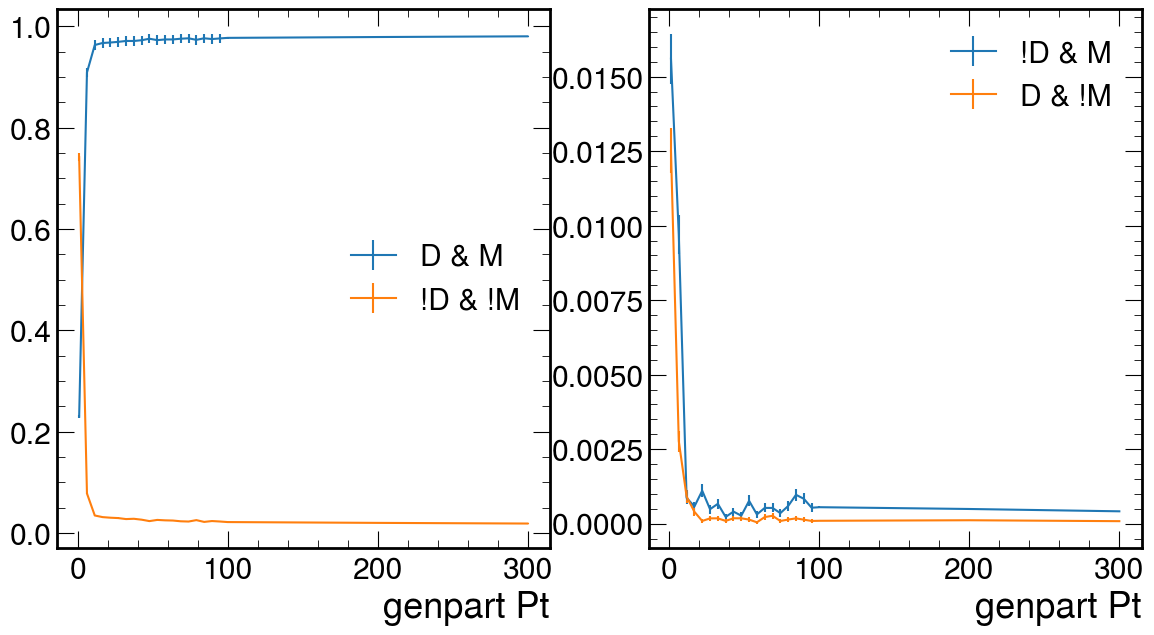

In [16]:
bins = np.concatenate([np.linspace(1, 100, 20), [200,300, 500]])

N_matched_both_pt, _ = np.histogram(dfj["genpart_pt_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)], 
               bins=bins )

N_matched_Donly_pt, _ = np.histogram(dfj["genpart_pt_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==0)], 
             bins=bins )

N_matched_Monly_pt, _= np.histogram(dfj["genpart_pt_M"][(dfj.sc_matched_D==0)&(dfj.sc_matched_M==1)], 
              bins=bins )

N_notmatched_pt, xbins = np.histogram(dfj["genpart_pt_M"][(dfj.sc_matched_D==0)&(dfj.sc_matched_M==0)], 
              bins=bins )

N_tot = N_matched_both_pt + N_matched_Donly_pt + N_matched_Monly_pt + N_notmatched_pt

fig, (ax,bx) = plt.subplots(1,2, figsize=(14,7))

err_both =  np.sqrt(  (1/N_tot)**2 * N_matched_both_pt + (N_matched_both_pt/N_tot**2)**2*N_tot)
err_notmatched =  np.sqrt(  (1/N_tot)**2 * N_notmatched_pt + (N_notmatched_pt/N_tot**2)**2*N_tot)
err_Donly =  np.sqrt(  (1/N_tot)**2 * N_matched_Donly_pt + (N_matched_Donly_pt/N_tot**2)**2*N_tot)
err_Monly =  np.sqrt(  (1/N_tot)**2 * N_matched_Monly_pt + (N_matched_Monly_pt/N_tot**2)**2*N_tot)

ax.errorbar(xbins[:-1], N_matched_both_pt/N_tot, err_both, label="D & M")
ax.errorbar(xbins[:-1], N_notmatched_pt/N_tot, err_notmatched, label="!D & !M")
bx.errorbar(xbins[:-1], N_matched_Monly_pt/N_tot,err_Monly, label="!D & M")
bx.errorbar(xbins[:-1], N_matched_Donly_pt/N_tot,err_Donly, label="D & !M")
ax.set_xlabel("genpart Pt")
bx.set_xlabel("genpart Pt")

ax.legend()
bx.legend()

In [12]:
[f for f in dfj.columns if "ncls" in f]

['ncls_sel_M',
 'ncls_sel_true_M',
 'ncls_sel_false_M',
 'ncls_true_M',
 'ncls_tot_M',
 'ncls_missing_M',
 'ncls_sel_D',
 'ncls_sel_true_D',
 'ncls_sel_false_D',
 'ncls_true_D',
 'ncls_tot_D',
 'ncls_missing_D']

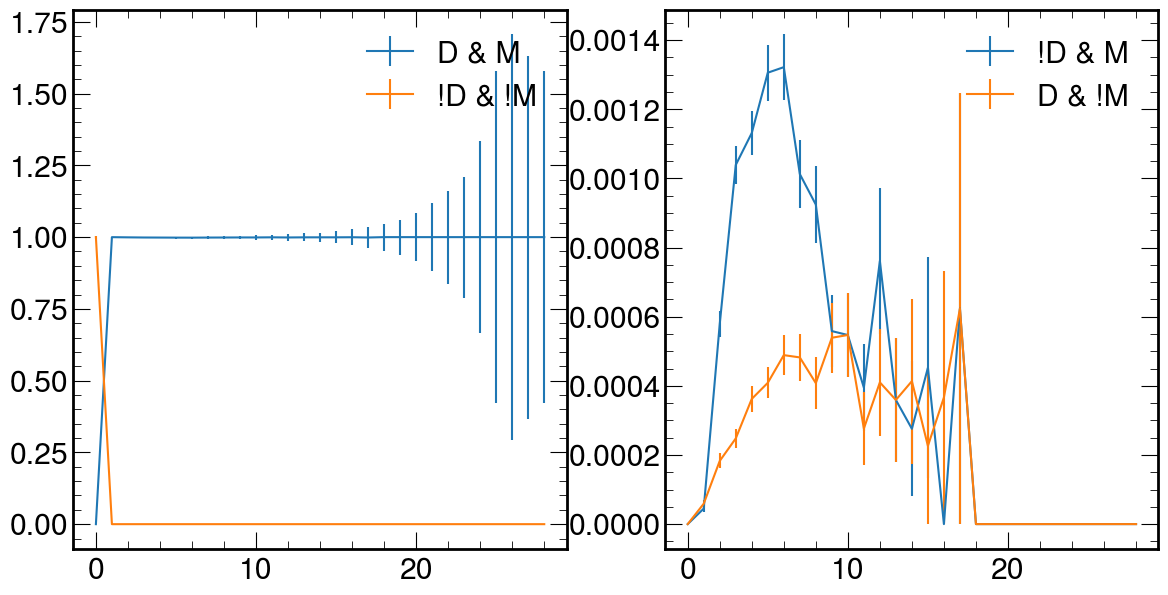

In [13]:
bins = list(range(0, 30))

N_matched_both_pt, _ = np.histogram(dfj["ncls_tot_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)], 
               bins=bins )

N_matched_Donly_pt, _ = np.histogram(dfj["ncls_tot_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==0)], 
             bins=bins )

N_matched_Monly_pt, _= np.histogram(dfj["ncls_tot_M"][(dfj.sc_matched_D==0)&(dfj.sc_matched_M==1)], 
              bins=bins )

N_notmatched_pt, xbins = np.histogram(dfj["ncls_tot_M"][(dfj.sc_matched_D==0)&(dfj.sc_matched_M==0)], 
              bins=bins )

N_tot = N_matched_both_pt + N_matched_Donly_pt + N_matched_Monly_pt + N_notmatched_pt

fig, (ax,bx) = plt.subplots(1,2, figsize=(14,7))

err_both =  np.sqrt(  (1/N_tot)**2 * N_matched_both_pt + (N_matched_both_pt/N_tot**2)**2*N_tot)
err_notmatched =  np.sqrt(  (1/N_tot)**2 * N_notmatched_pt + (N_notmatched_pt/N_tot**2)**2*N_tot)
err_Donly =  np.sqrt(  (1/N_tot)**2 * N_matched_Donly_pt + (N_matched_Donly_pt/N_tot**2)**2*N_tot)
err_Monly =  np.sqrt(  (1/N_tot)**2 * N_matched_Monly_pt + (N_matched_Monly_pt/N_tot**2)**2*N_tot)

ax.errorbar(xbins[:-1], N_matched_both_pt/N_tot, err_both, label="D & M")
ax.errorbar(xbins[:-1], N_notmatched_pt/N_tot, err_notmatched, label="!D & !M")
bx.errorbar(xbins[:-1], N_matched_Monly_pt/N_tot,err_Monly, label="!D & M")
bx.errorbar(xbins[:-1], N_matched_Donly_pt/N_tot,err_Donly, label="D & !M")

ax.legend()
bx.legend()

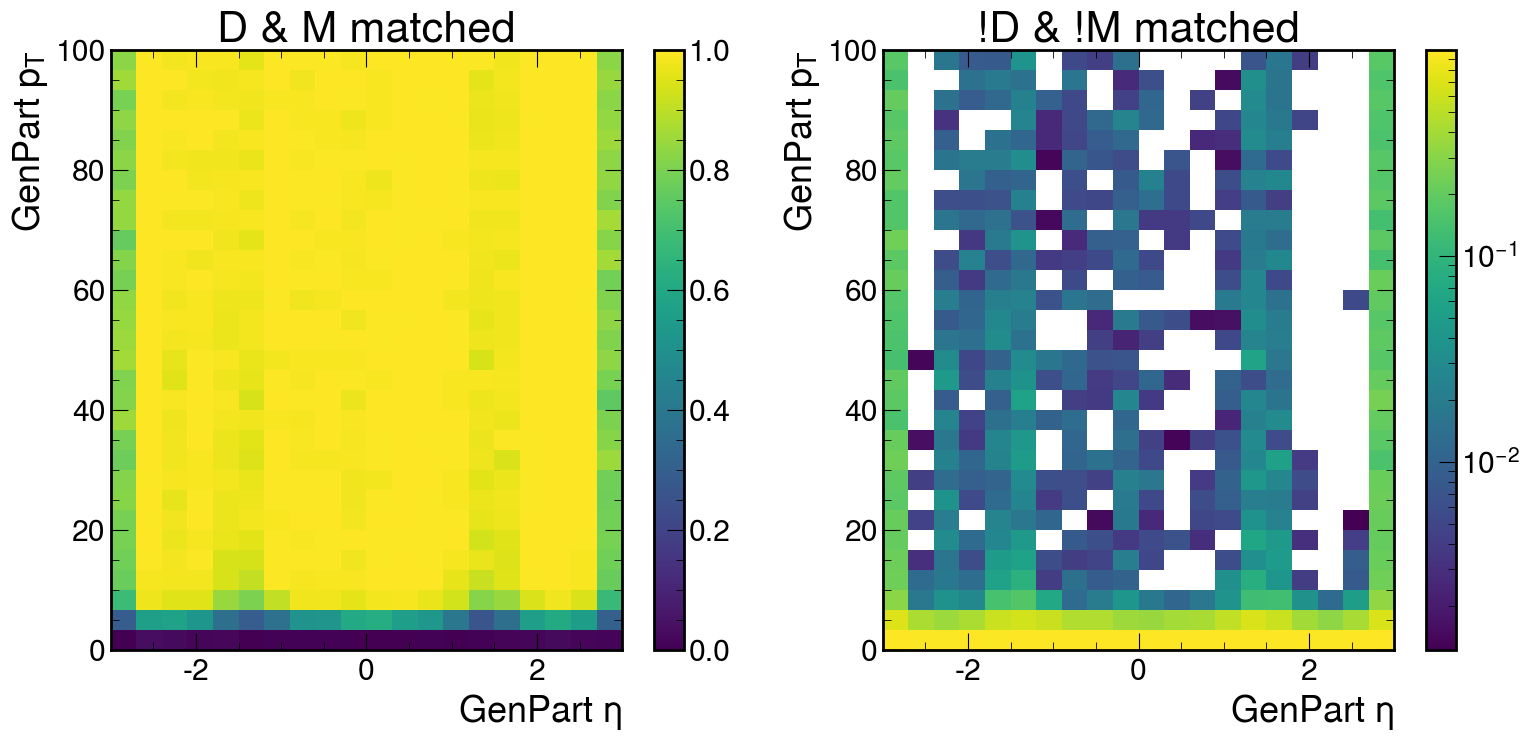

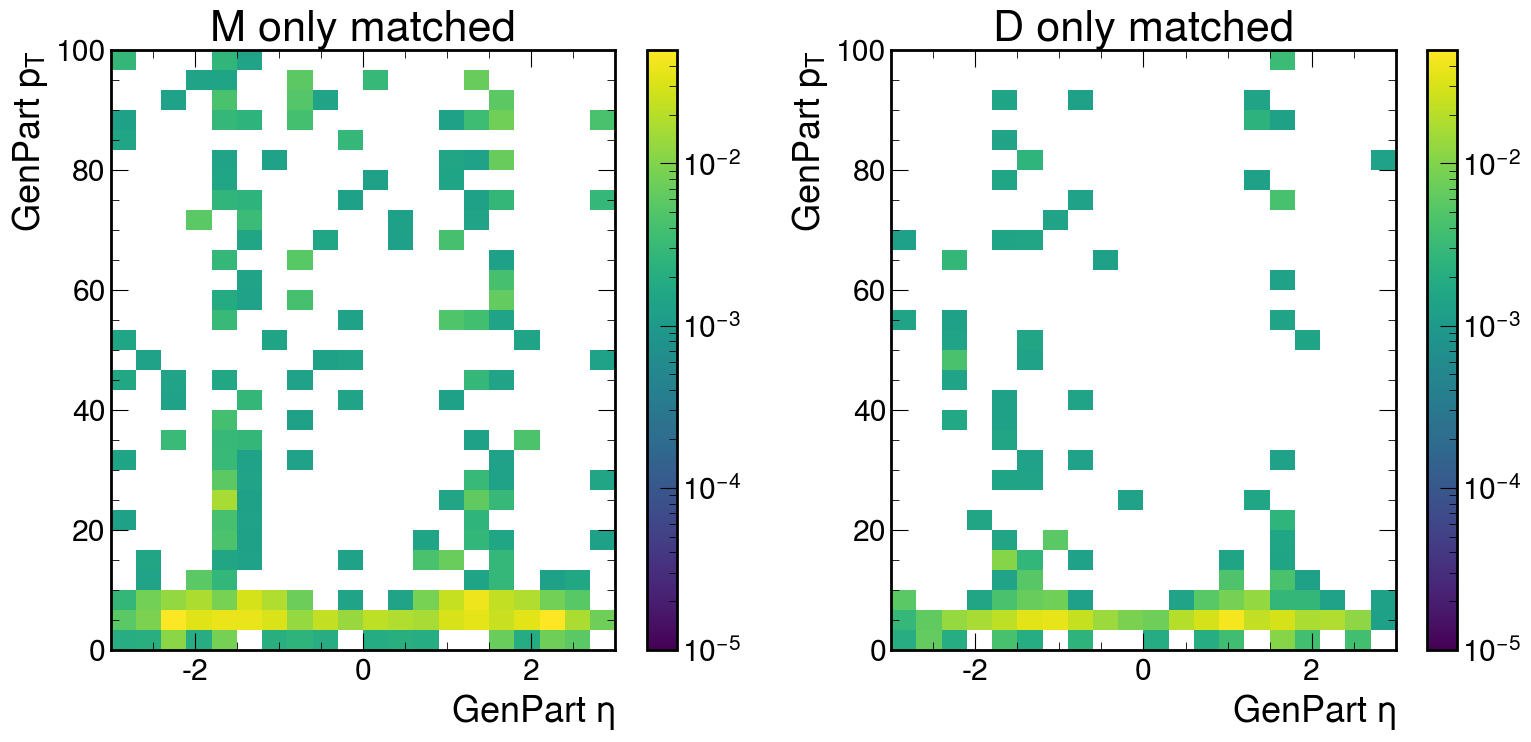

In [15]:
bins = (20, 30)
rrange = ((-3,3),(0,100))
df_join = dfj
N_matched_both_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)],
                                            dfj["genpart_pt_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(df_join.sc_matched_D==1)&(df_join.sc_matched_M==0)],
                                             dfj["genpart_pt_D"][(df_join.sc_matched_D==1)&(df_join.sc_matched_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(df_join["genpart_eta_M"][(df_join.sc_matched_D==0)&(df_join.sc_matched_M==1)], 
                                            df_join["genpart_pt_M"][(df_join.sc_matched_D==0)&(df_join.sc_matched_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(df_join["genpart_eta_M"][(df_join.sc_matched_D==0)&(df_join.sc_matched_M==0)], 
                                                  df_join["genpart_pt_M"][(df_join.sc_matched_D==0)&(df_join.sc_matched_M==0)], 
             bins=bins, range=rrange )

N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta

X, Y = np.meshgrid(xbins, ybins)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.tight_layout()

plt.savefig(f"{output_folder}/Matched_genparticle_SC_etapt_1.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_etapt_1.pdf")

fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(16,8))
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-5,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-5,))

ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")

ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax3.set_title("M only matched")
ax4.set_title("D only matched")

plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_etapt_2.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_etapt_2.pdf")

/tmp/ipykernel_30375/1368916839.py:13: RuntimeWarning: invalid value encountered in divide
  a = A/s


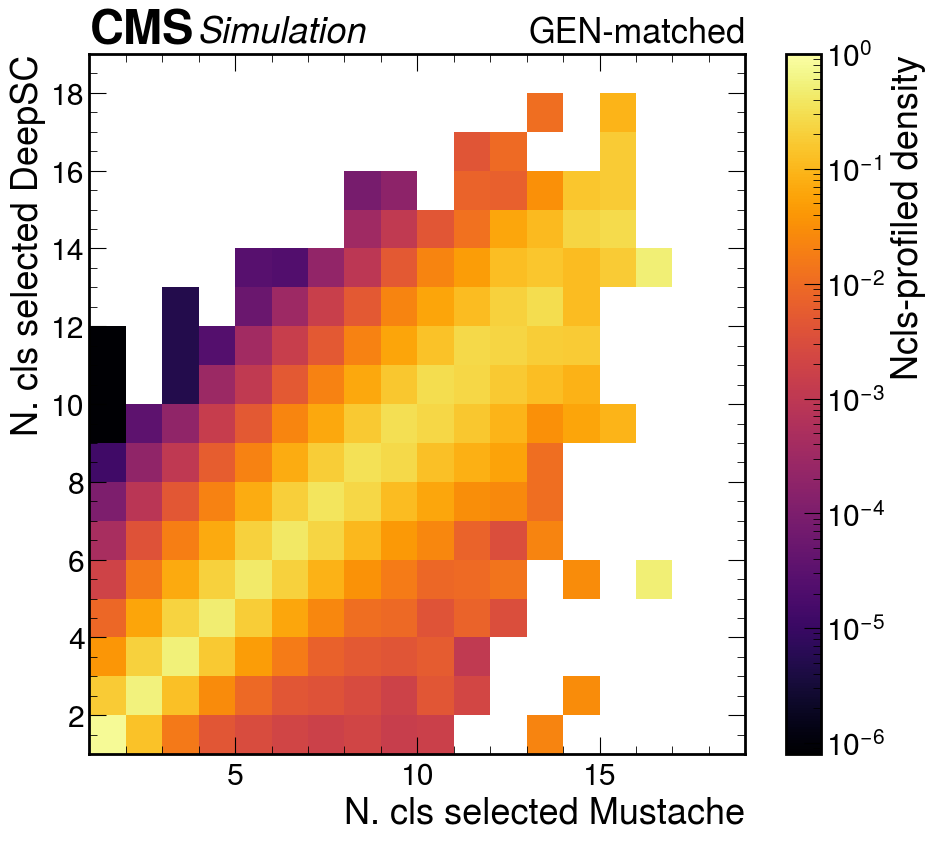

In [18]:
xbins = list(range(1, 20))
ybins =  list(range(1, 20))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(10,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("N. cls selected DeepSC")
ax.set_xlabel("N. cls selected Mustache")

hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls.pdf")

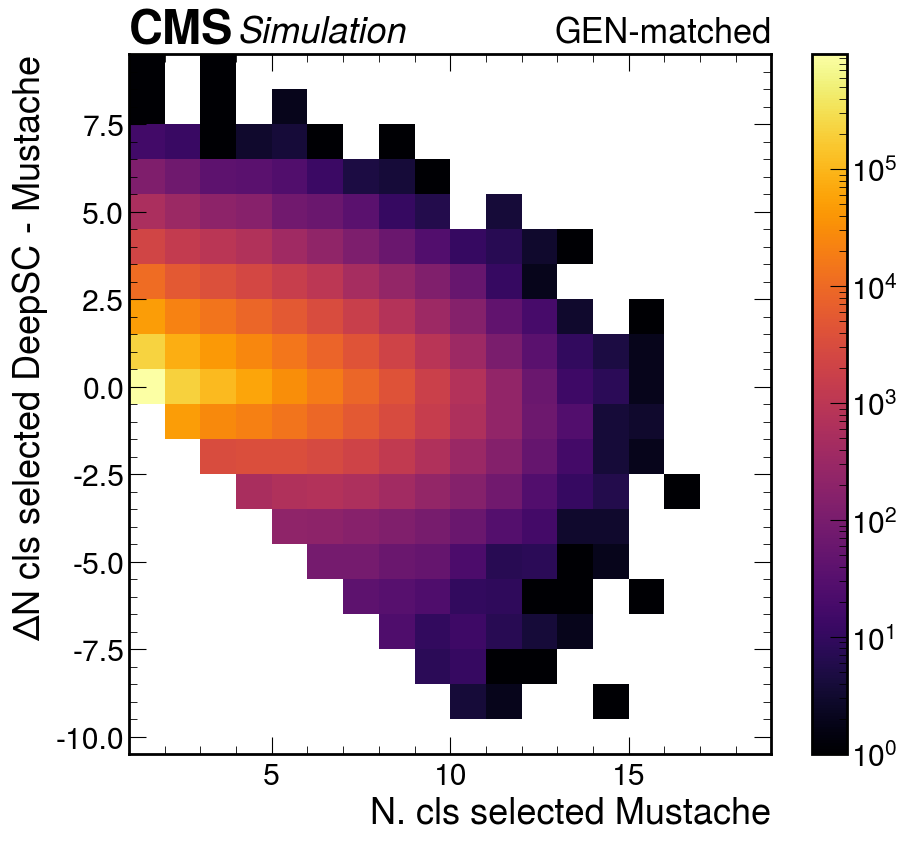

In [20]:
xbins = list(range(1, 20))
ybins =  [f+0.5 for f in range(-11, 10)]

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(10,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D-dfmatched_sc.ncls_sel_M, bins=(xbins, ybins ))

#s = np.expand_dims(np.sum(A, axis=-1), axis=1)
#a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, cmap="inferno",norm=LogNorm())

fig.colorbar(I, ax=ax)
ax.set_xlabel("N. cls selected Mustache")
ax.set_ylabel("$\Delta N$ cls selected DeepSC - Mustache")

hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls_diff.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls_diff.pdf")

/tmp/ipykernel_30375/306725357.py:13: RuntimeWarning: invalid value encountered in divide
  a = A/s


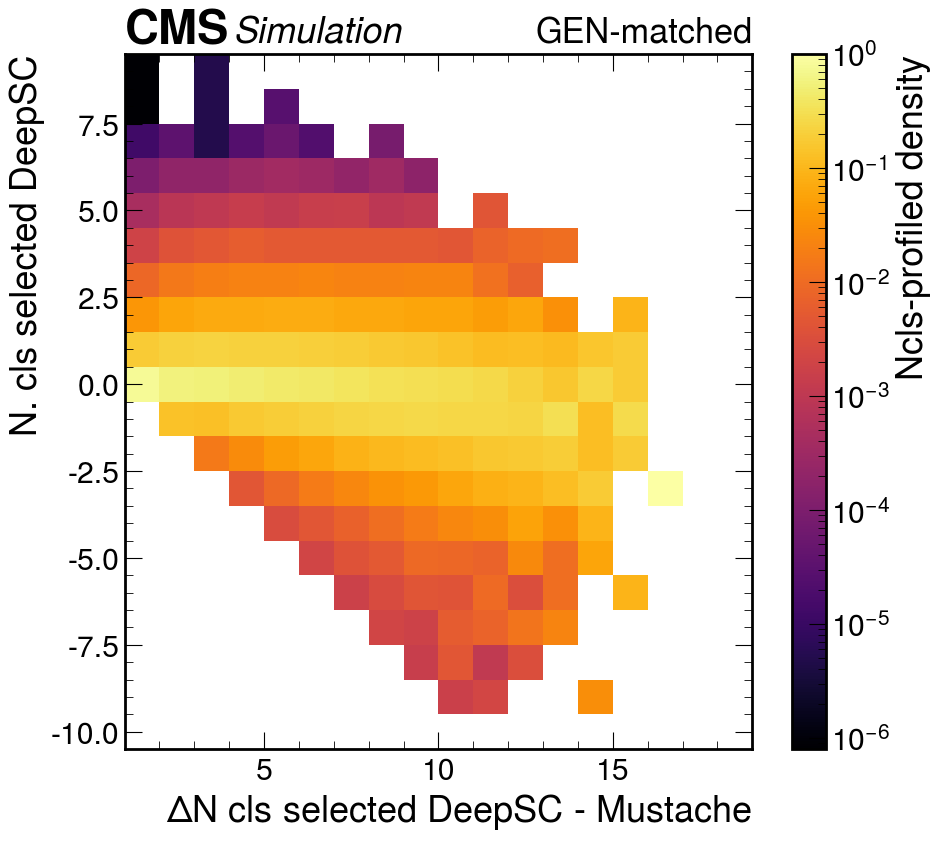

In [21]:
xbins = list(range(1, 20))
ybins =  [f+0.5 for f in range(-11, 10)]

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(10,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D-dfmatched_sc.ncls_sel_M, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("N. cls selected DeepSC")
ax.set_xlabel("$\Delta N$ cls selected DeepSC - Mustache")

hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls_diff_profiled.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls_diff_profiled.pdf")

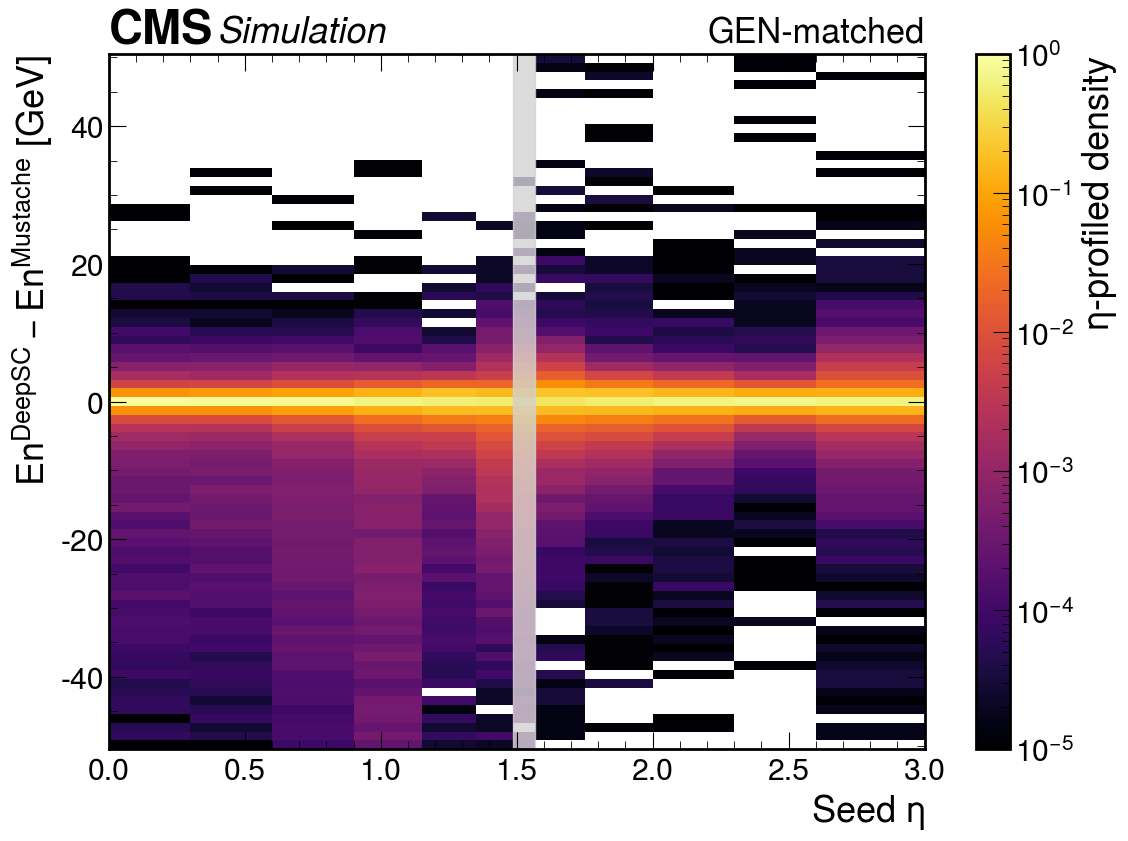

In [22]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-50.5,50.5,80)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, 
                                  dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-50.5,-50.5],[50.5,50.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("Seed $\eta$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_etaM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_etaM.pdf")

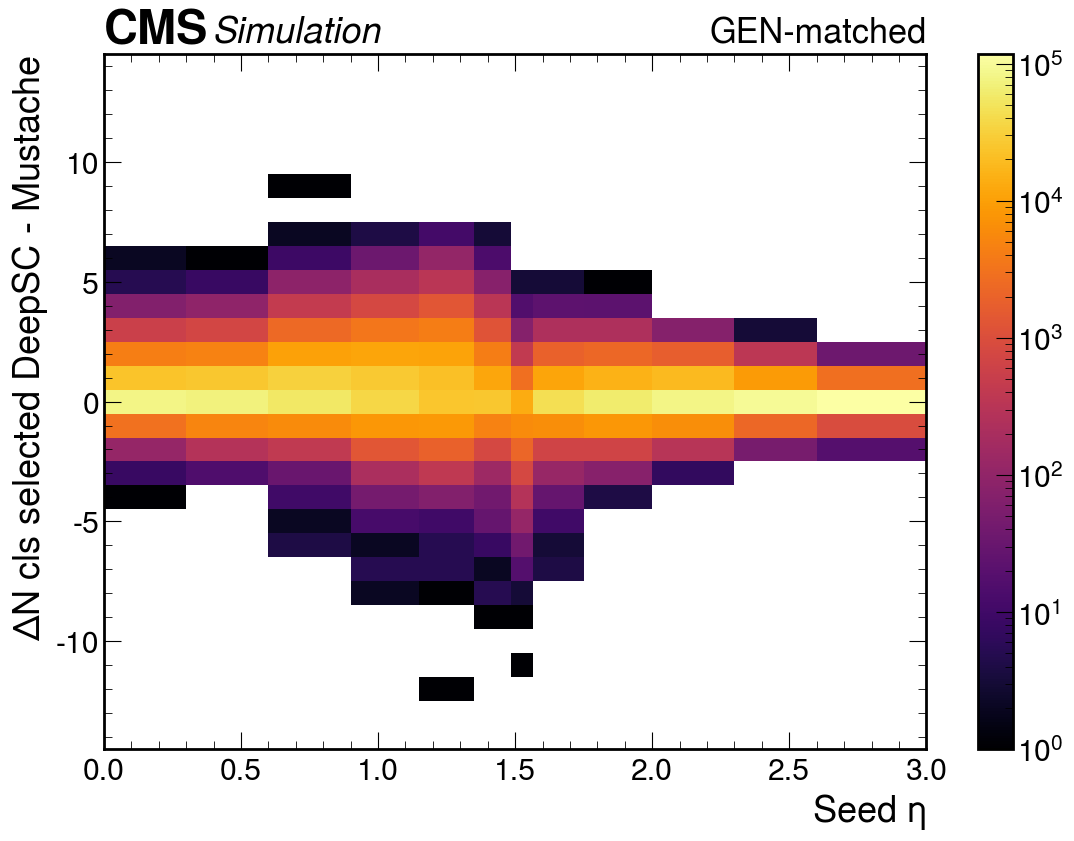

In [24]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = np.linspace(-14.5,14.5,30)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, 
                                  dfmatched_sc.ncls_sel_D - dfmatched_sc.ncls_sel_M,
                                  bins=(etas, ybins ))
# s = np.expand_dims(np.sum(A, axis=-1), axis=1)
# a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-14.5,14.5],[-14.5,14.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, )   
ax.set_ylabel("$\Delta N$ cls selected DeepSC - Mustache")
ax.set_xlabel("Seed $\eta$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)

plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_etaM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_etaM.pdf")

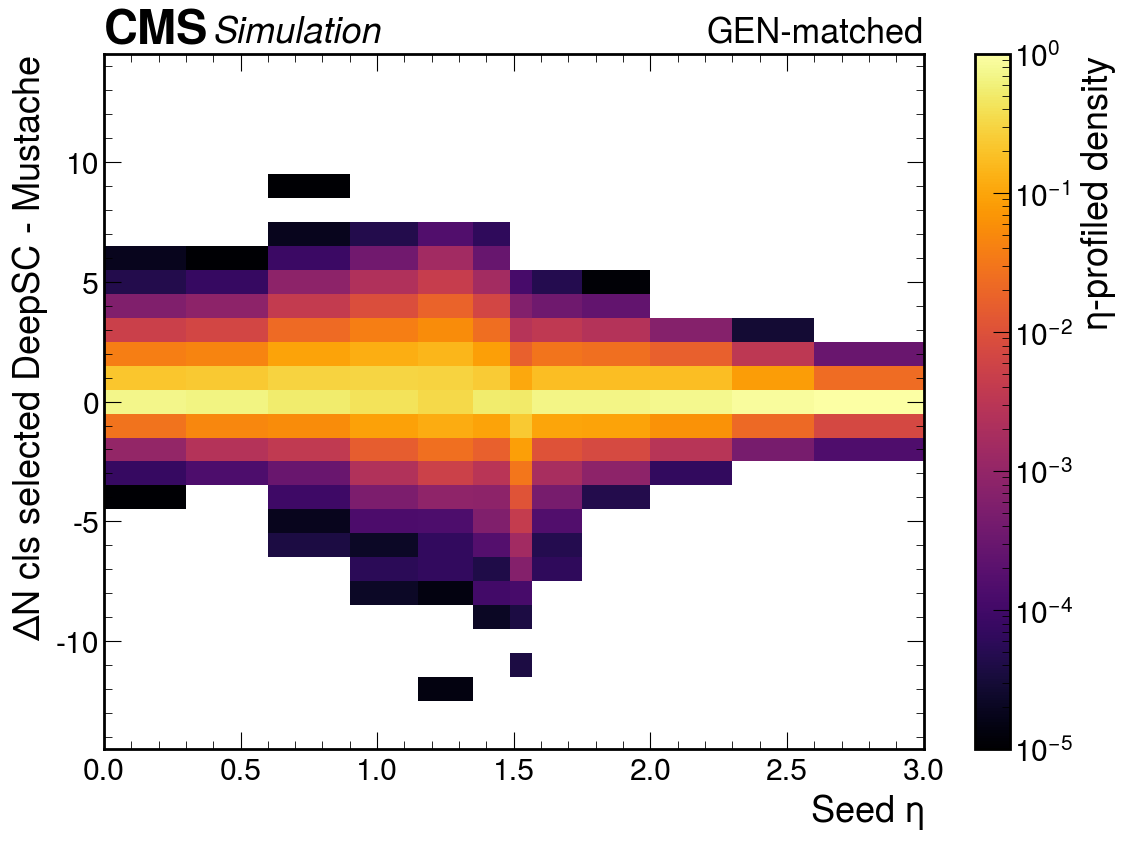

In [25]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = np.linspace(-14.5,14.5,30)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, 
                                  dfmatched_sc.ncls_sel_D - dfmatched_sc.ncls_sel_M,
                                  bins=(etas, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-14.5,14.5],[-14.5,14.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$\Delta N$ cls selected DeepSC - Mustache")
ax.set_xlabel("Seed $\eta$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)

plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_profiled_etaM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_profiled_etaM.pdf")

/tmp/ipykernel_30375/2836416979.py:12: RuntimeWarning: invalid value encountered in divide
  a = A/s


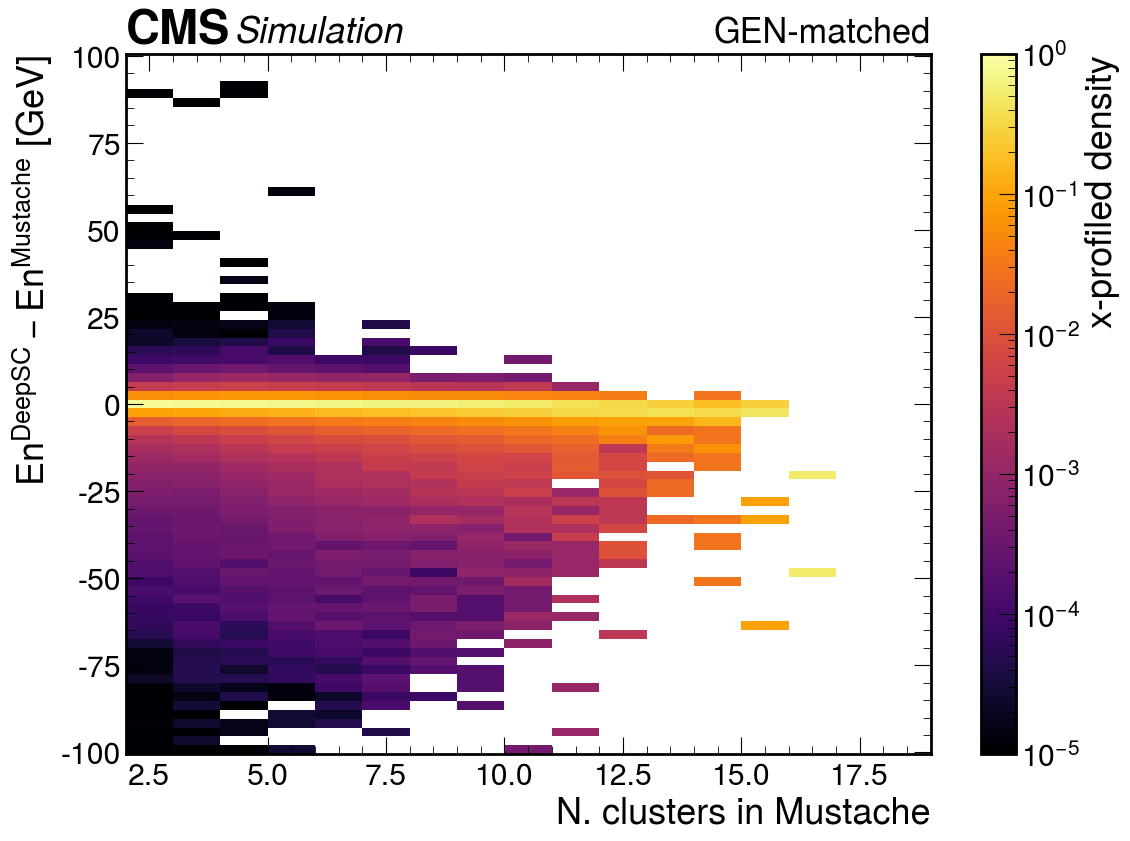

In [26]:
etas =  np.arange(2, 20)
xbins = np.linspace(-100.5,100.5,80)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("N. clusters in Mustache")

hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)

plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_nclsM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_nclsM.pdf")

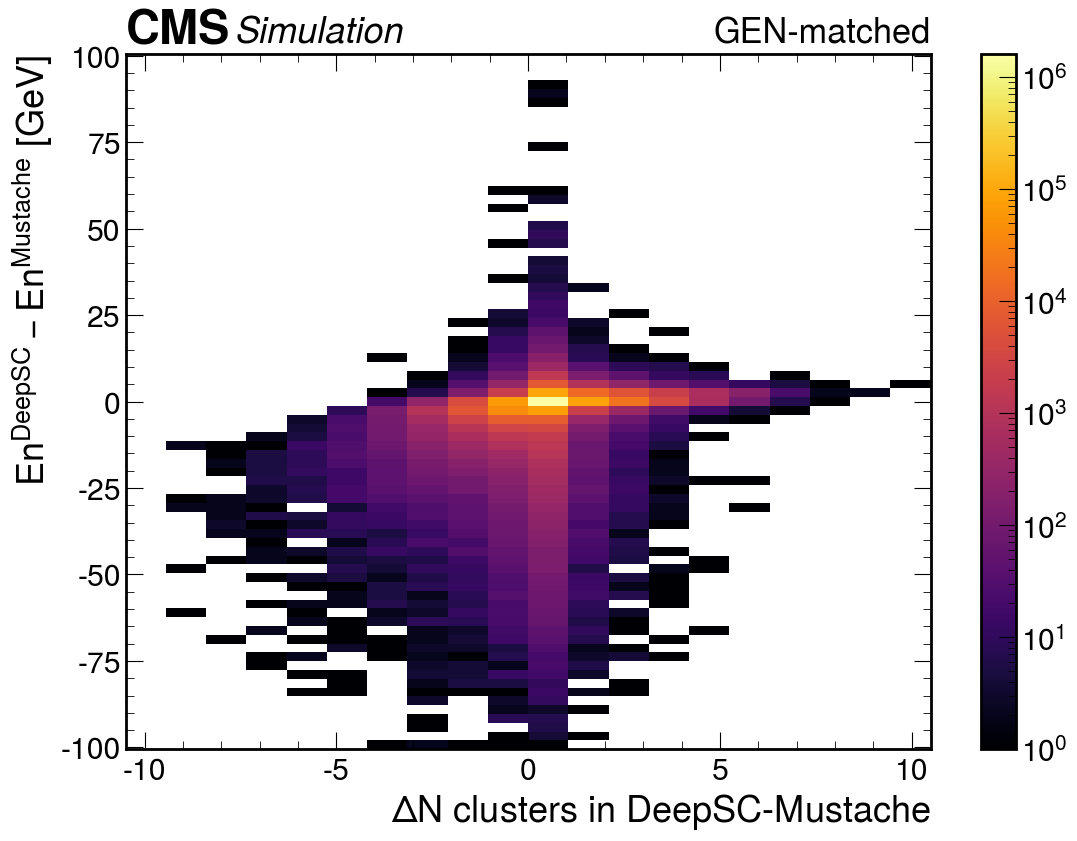

In [29]:
etas =  np.linspace(-10.5,10.5,21)
xbins = np.linspace(-100.5,100.5,80)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_D- dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,
                                  bins=(etas, xbins ))
# s = np.expand_dims(np.sum(A, axis=-1), axis=1)
# a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax)   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("$\Delta N$ clusters in DeepSC-Mustache")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls_noprof.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls_noprof.pdf")

/tmp/ipykernel_15537/1033960073.py:12: RuntimeWarning: invalid value encountered in divide
  a = A/s


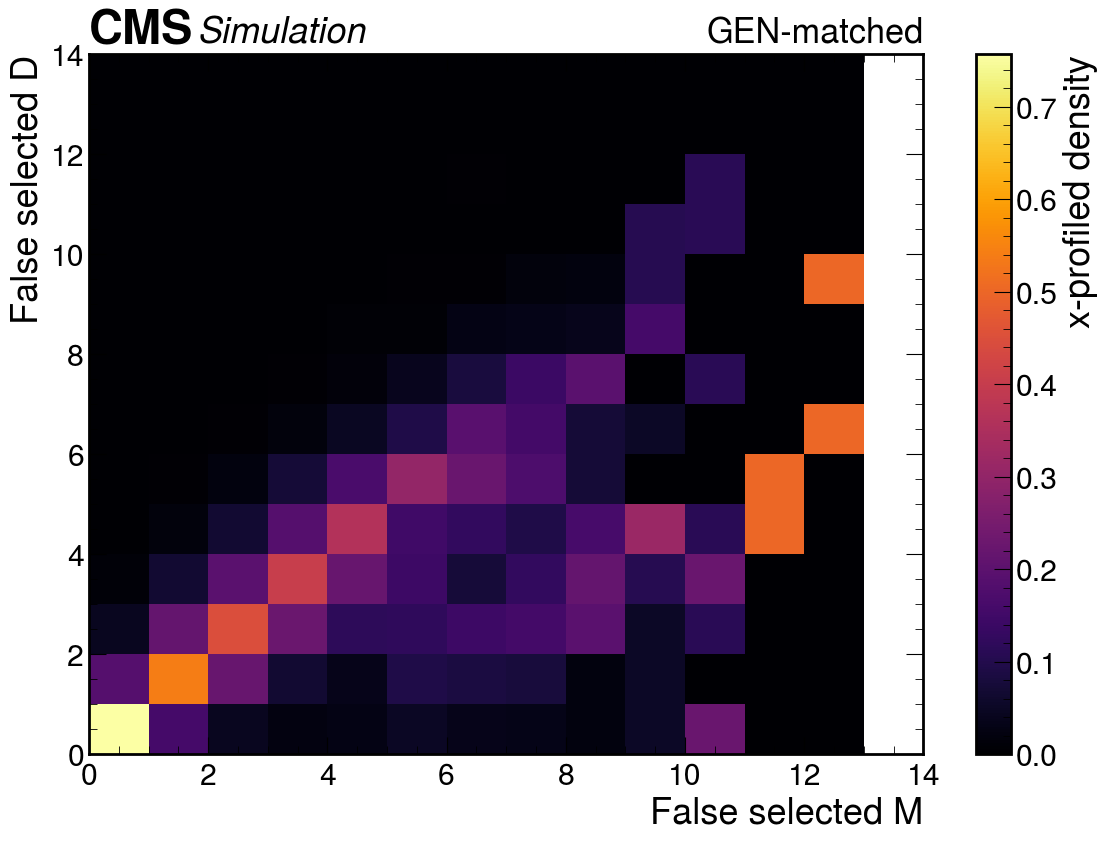

In [18]:
etas =  list(range(15))
xbins =  list(range(15))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_false_M,
                                  dfmatched_sc.ncls_sel_false_D,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("False selected D")
ax.set_xlabel("False selected M")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
#plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls.png")
#/'plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls.pdf")

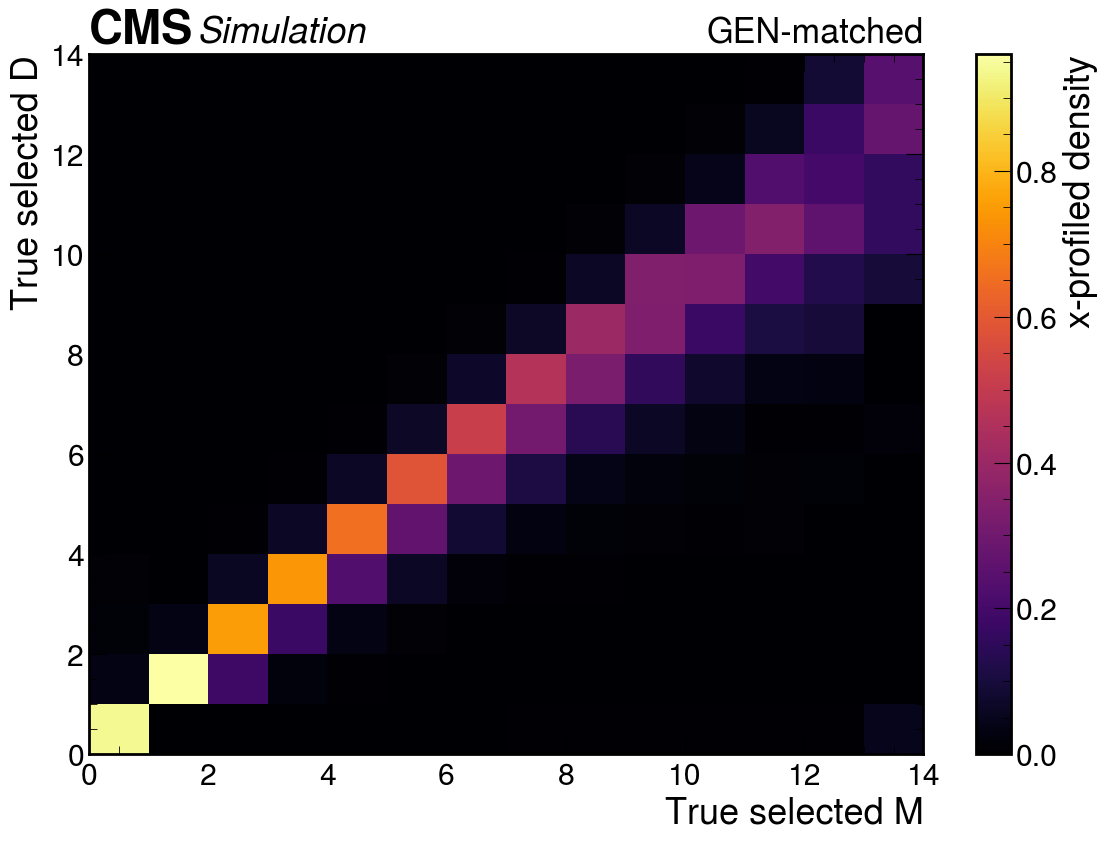

In [22]:
etas =  list(range(15))
xbins =  list(range(15))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_true_M,
                                  dfmatched_sc.ncls_sel_true_D,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("True selected D")
ax.set_xlabel("True selected M")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
#plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls.png")
#/'plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls.pdf")

/tmp/ipykernel_30375/3626079698.py:12: RuntimeWarning: invalid value encountered in divide
  a = A/s


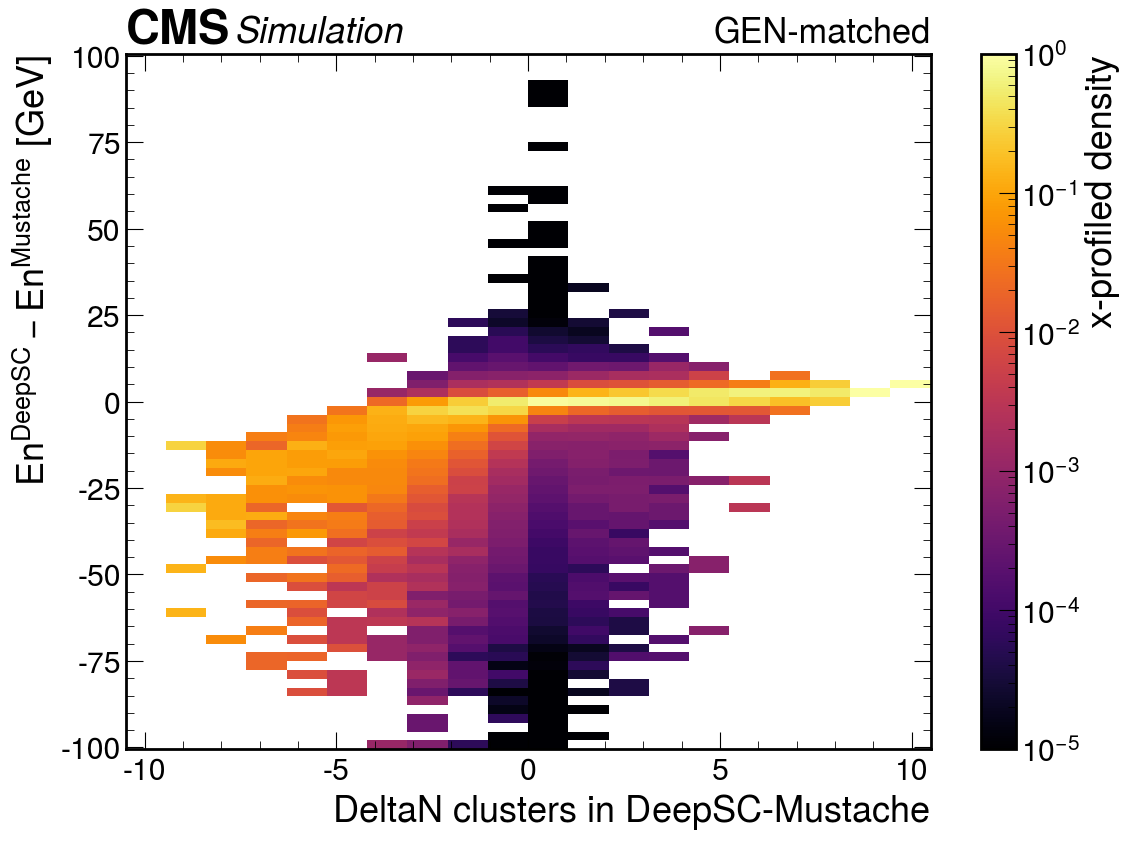

In [30]:
etas =  np.linspace(-10.5,10.5,21)
xbins = np.linspace(-100.5,100.5,80)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_D- dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("$Delta N$ clusters in DeepSC-Mustache")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)

plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls.pdf")

B: 2089046.0
A. 2089120.0


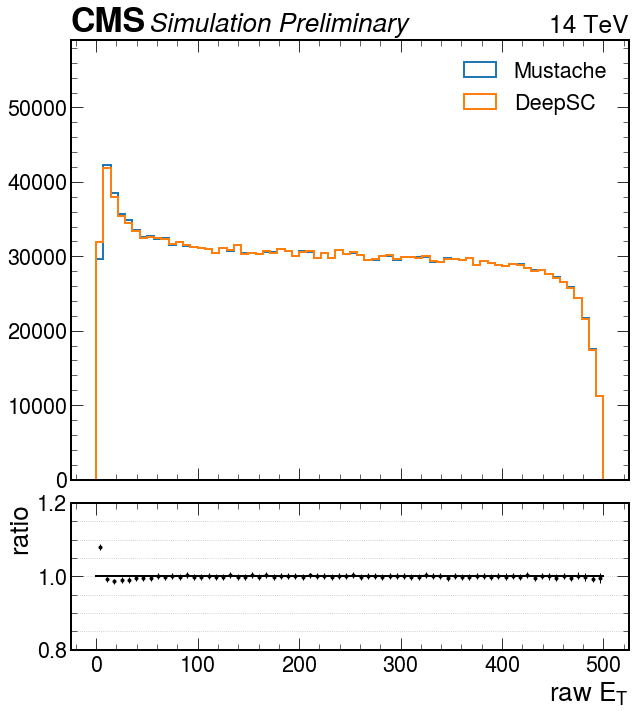

In [31]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.et_sc_raw_M, dfmatched_sc.et_sc_raw_D,
                var=f"SC_rawEt", label="raw $E_T$",
                output_folder=output_folder,
                bins=70, xrange=(0,500), ratio_lim=(0.8,1.2))

B: 2095842.0
A. 2095842.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: divide by zero encountered in divide
  A/B,
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_compari

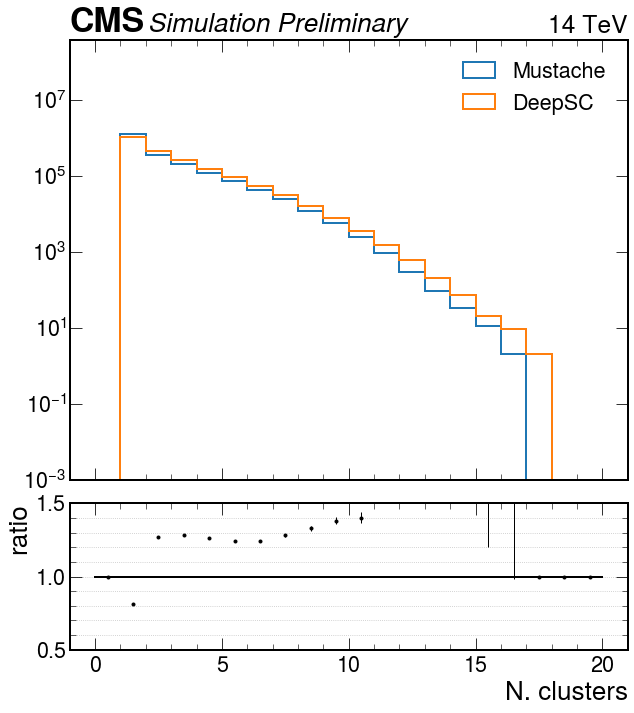

In [32]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.ncls_sel_M, dfmatched_sc.ncls_sel_D,
                var=f"SC_ncls_matched", label="N. clusters",
                output_folder=output_folder, ylog=True,
                bins=20, xrange=(0,20), ratio_lim=(0.5,1.5))

B: 846458.0
A. 1076755.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: invalid value encountered in divide
  A/B,


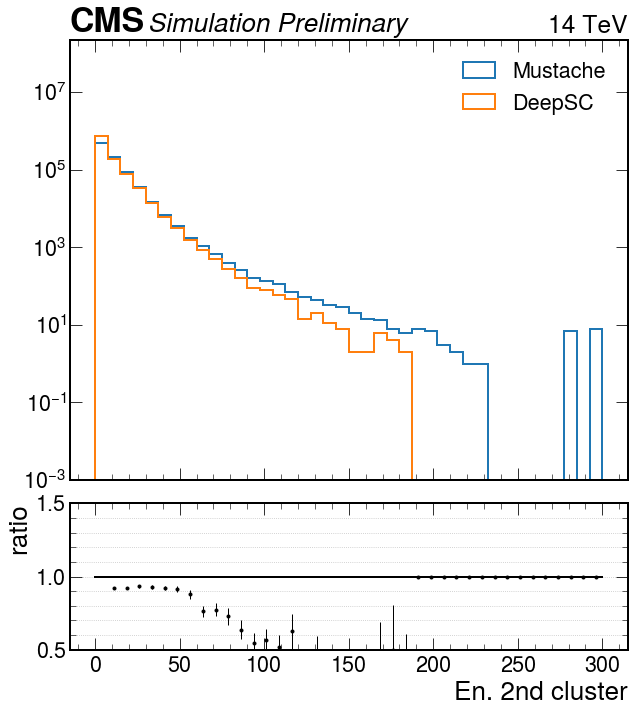

In [34]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.cl2_en_M, dfmatched_sc.cl2_en_D,
                var=f"SC_cl2_energy", label="En. 2nd cluster",
                output_folder=output_folder, ylog=True,
                bins=40, xrange=(0,300), ratio_lim=(0.5,1.5))

B: 486385.0
A. 618896.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: invalid value encountered in divide
  A/B,


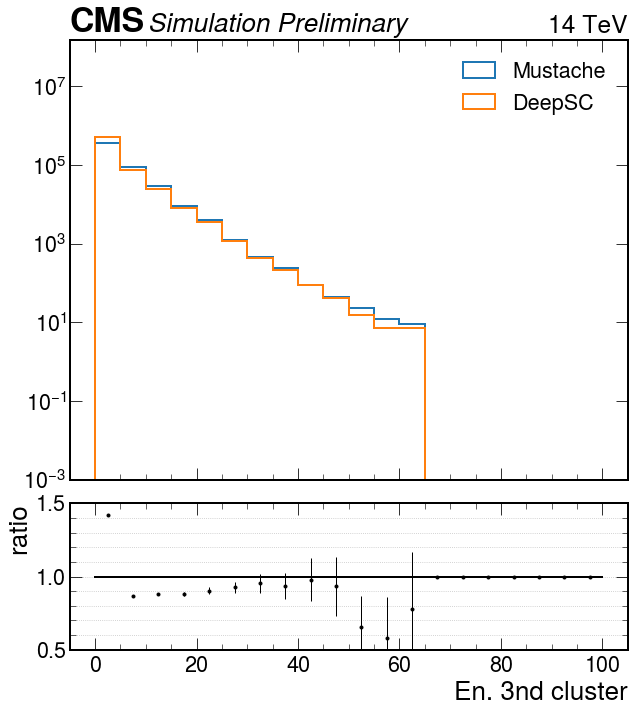

In [36]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.cl3_en_M, dfmatched_sc.cl3_en_D,
                var=f"SC_cl3_energy", label="En. 3nd cluster",
                output_folder=output_folder, ylog=True,
                bins=20, xrange=(0,100), ratio_lim=(0.5,1.5))

# patElectron matching

In [8]:
dfj.ele_isEcalDriven_M

0           True
1           True
2           -999
3           True
4          False
           ...  
2163899     True
2163900     True
2163901    False
2163902    False
2163903     True
Name: ele_isEcalDriven_M, Length: 2163904, dtype: object

/work/dvalsecc/miniconda3/envs/tfgpu/lib/python3.9/site-packages/numpy/lib/histograms.py:1124: RuntimeWarning: invalid value encountered in divide
  hist /= s


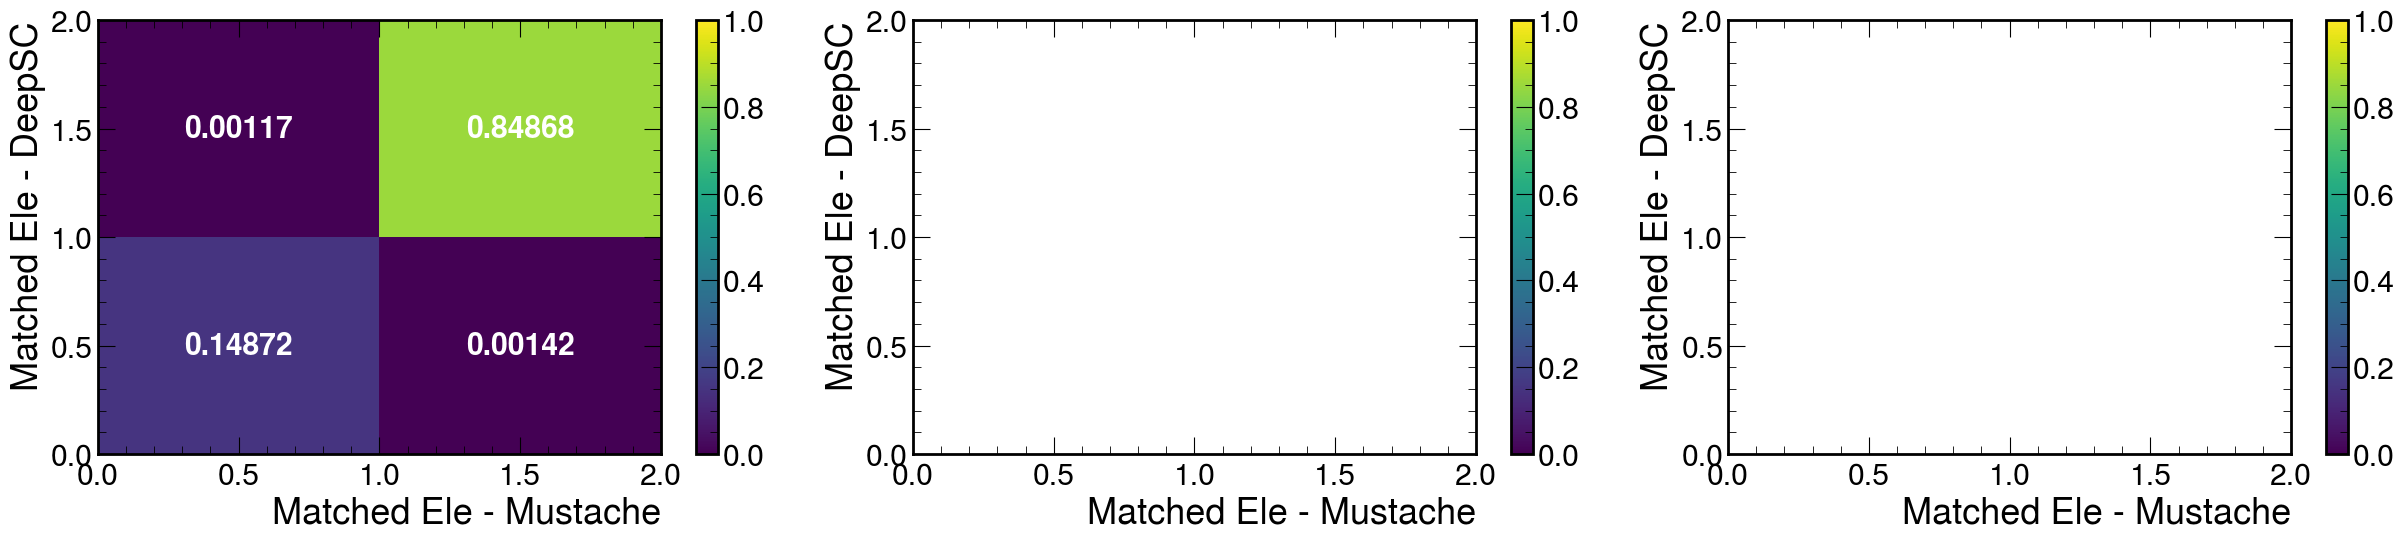

In [7]:
fig , (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(25,6))
ax = plt.gca()

hist, xbins, ybins = np.histogram2d(dfj.elematched_M, dfj.elematched_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
C = ax1.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax1.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax1)
ax1.set_xlabel("Matched Ele - Mustache")
ax1.set_ylabel("Matched Ele - DeepSC")

# ECAL driven
hist, xbins, ybins = np.histogram2d(dfj[dfj.ele_isEcalDriven_M==1].elematched_M, 
                                    dfj[dfj.ele_isEcalDriven_D==1].elematched_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
C = ax2.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax2.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax2)
ax2.set_xlabel("Matched Ele - Mustache")
ax2.set_ylabel("Matched Ele - DeepSC")


#Tracker driven
hist, xbins, ybins = np.histogram2d(dfj[dfj.ele_isTrackerDriven_M==1].elematched_M, 
                                    dfj[dfj.ele_isTrackerDriven_D==1].elematched_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
C = ax3.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax3.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax3)
ax3.set_xlabel("Matched Ele - Mustache")
ax3.set_ylabel("Matched Ele - DeepSC")




plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_ele_inclusive.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_inclusive.pdf")

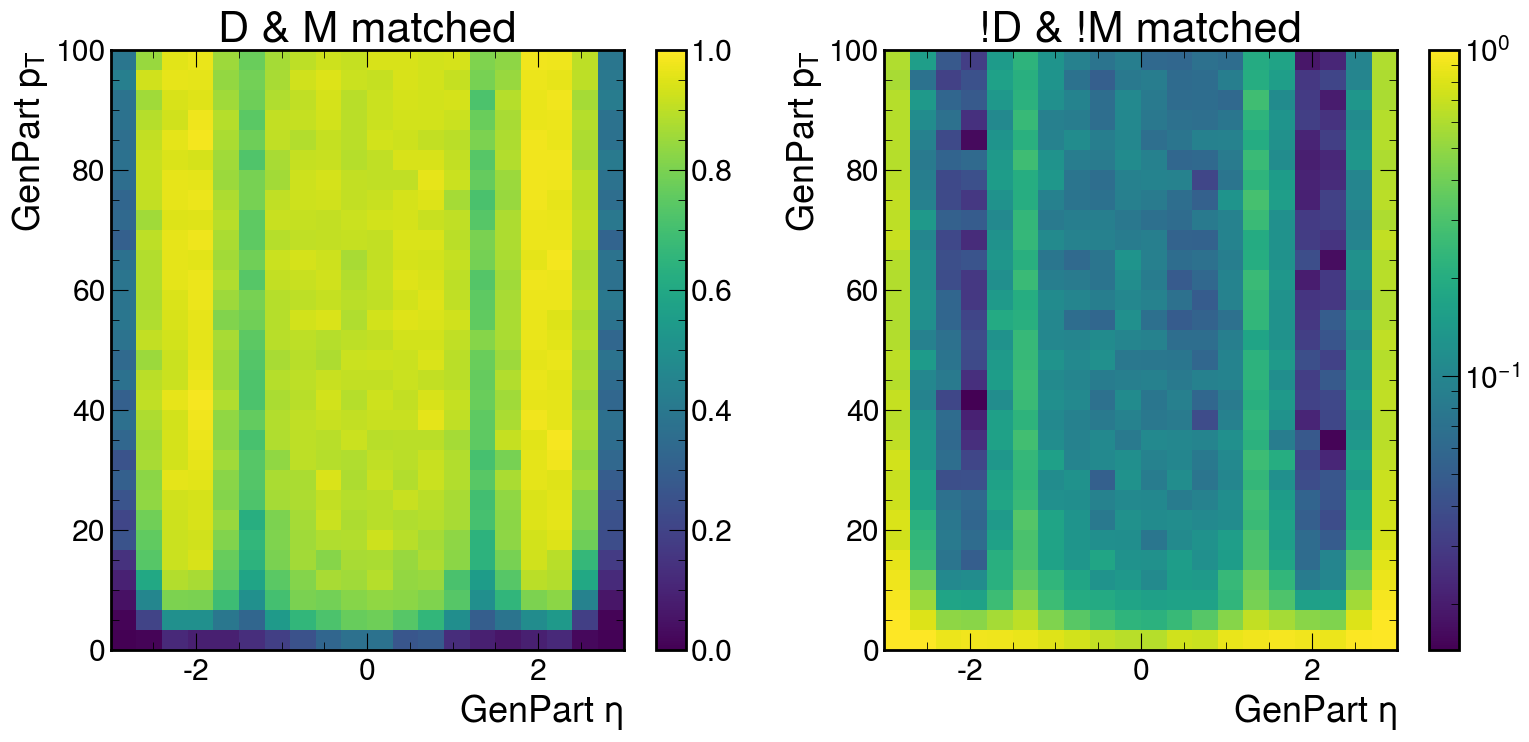

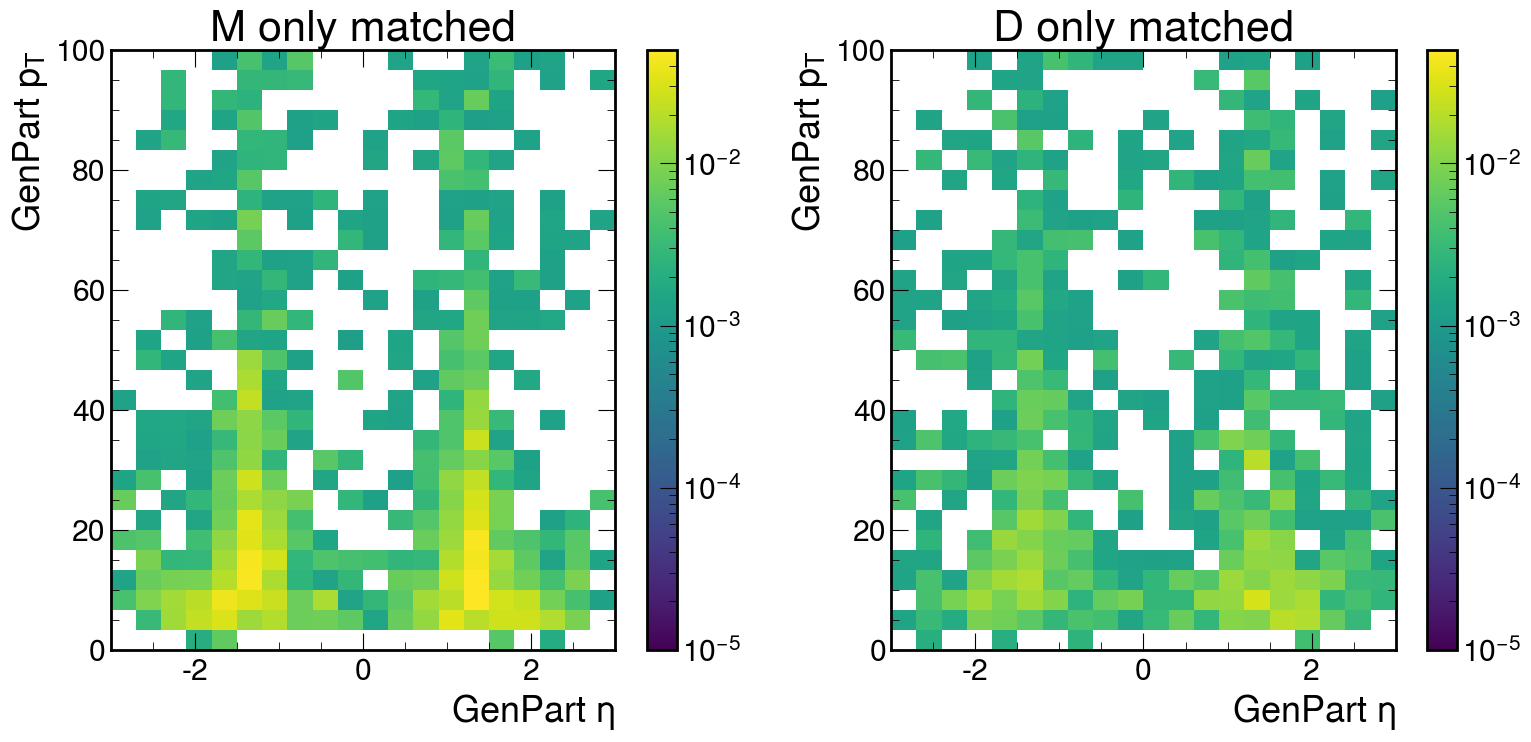

In [38]:
bins = (20, 30)
rrange = ((-3,3),(0,100))
N_matched_both_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)],
                                            dfj["genpart_pt_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.elematched_D==1)&(dfj.elematched_M==0)],
                                             dfj["genpart_pt_D"][(dfj.elematched_D==1)&(dfj.elematched_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(dfj["genpart_eta_M"][(dfj.elematched_D==0)&(dfj.elematched_M==1)], 
                                            dfj["genpart_pt_M"][(dfj.elematched_D==0)&(dfj.elematched_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(dfj["genpart_eta_M"][(dfj.elematched_D==0)&(dfj.elematched_M==0)], 
                                                  dfj["genpart_pt_M"][(dfj.elematched_D==0)&(dfj.elematched_M==0)], 
             bins=bins, range=rrange )



N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta

X, Y = np.meshgrid(xbins, ybins)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.tight_layout()

plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.pdf")

fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(16,8))
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-5,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-5,))

ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")

ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax3.set_title("M only matched")
ax4.set_title("D only matched")

plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.pdf")

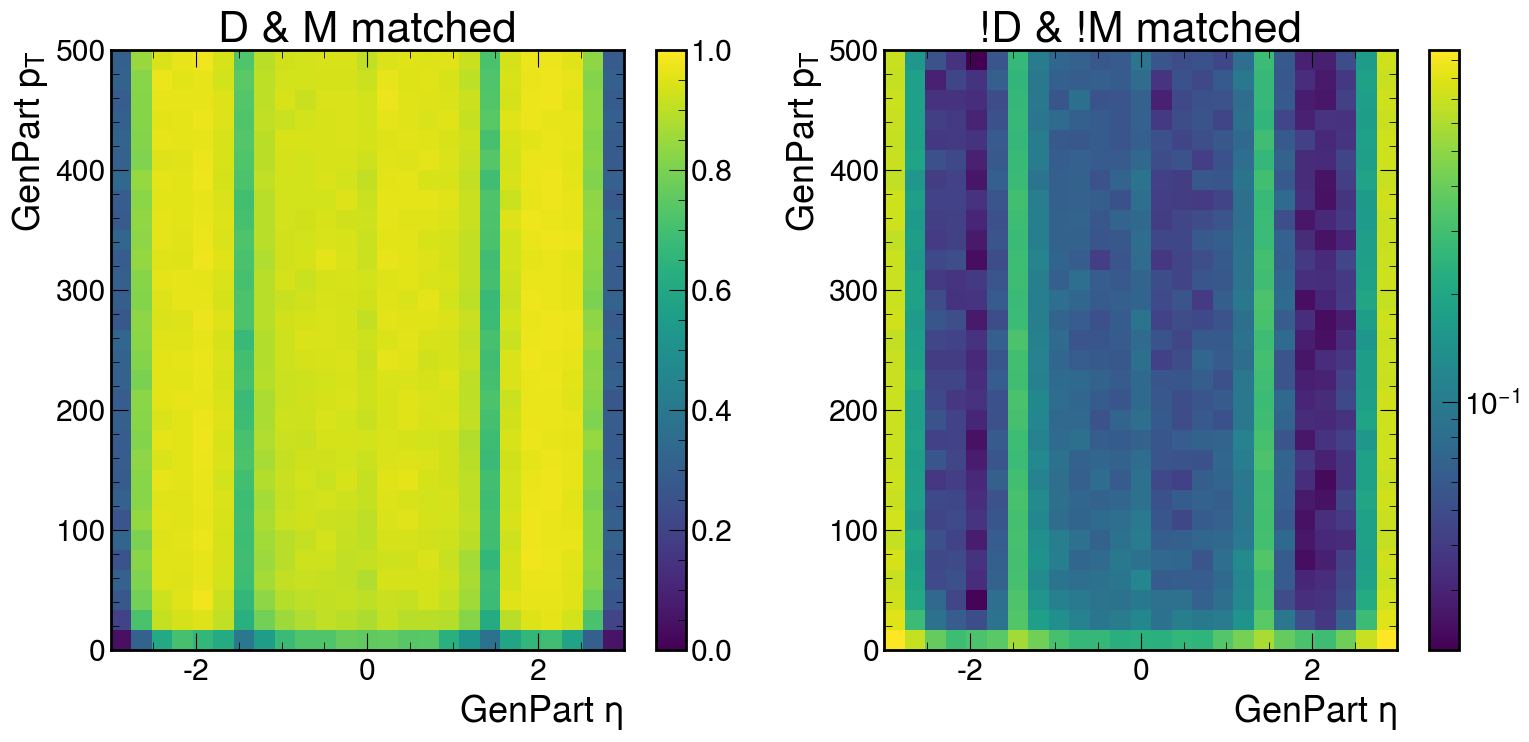

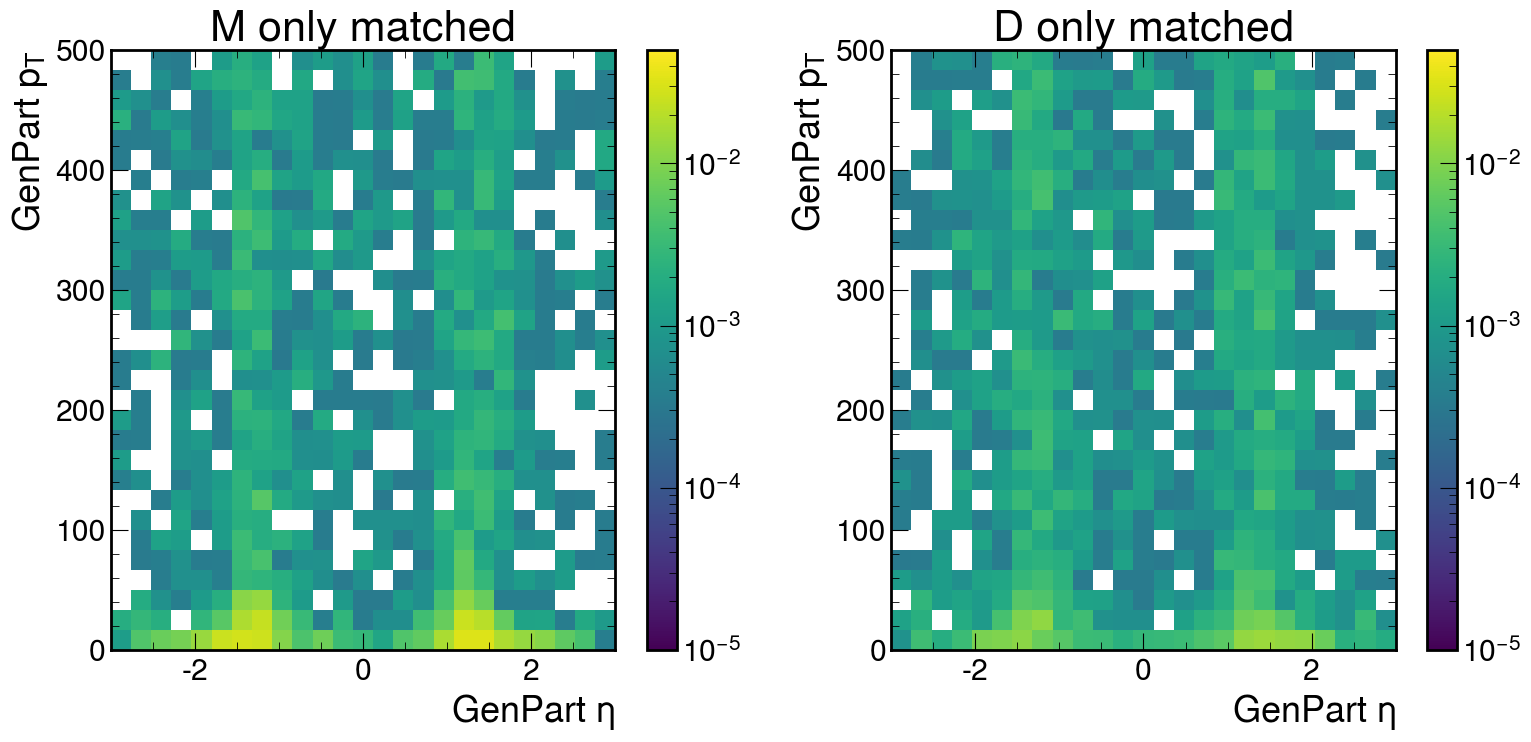

In [40]:
bins = (25, 30)
rrange = ((-3,3),(0,500))
df_join = dfj
N_matched_both_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)],
                                            dfj["genpart_pt_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.elematched_D==1)&(dfj.elematched_M==0)],
                                             dfj["genpart_pt_D"][(dfj.elematched_D==1)&(dfj.elematched_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(dfj["genpart_eta_M"][(dfj.elematched_D==0)&(dfj.elematched_M==1)], 
                                            dfj["genpart_pt_M"][(dfj.elematched_D==0)&(dfj.elematched_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(dfj["genpart_eta_M"][(dfj.elematched_D==0)&(dfj.elematched_M==0)], 
                                                  dfj["genpart_pt_M"][(dfj.elematched_D==0)&(dfj.elematched_M==0)], 
             bins=bins, range=rrange )



N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta

X, Y = np.meshgrid(xbins, ybins)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.tight_layout()

plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.pdf")

fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(16,8))
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-5,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-5,))

ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")

ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax3.set_title("M only matched")
ax4.set_title("D only matched")

plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.pdf")

### Tracker driven

In [58]:
dfj.ele_isTrackerDriven_D

0          False
1           True
2           -999
3           True
4           True
           ...  
2163899    False
2163900     True
2163901     True
2163902     True
2163903    False
Name: ele_isTrackerDriven_D, Length: 2163904, dtype: object

In [68]:
(dfj.ele_isEcalDriven_M==1)

0          False
1          False
2          False
3          False
4          False
           ...  
2163899    False
2163900    False
2163901    False
2163902    False
2163903    False
Name: ele_isEcalDriven_M, Length: 2163904, dtype: bool

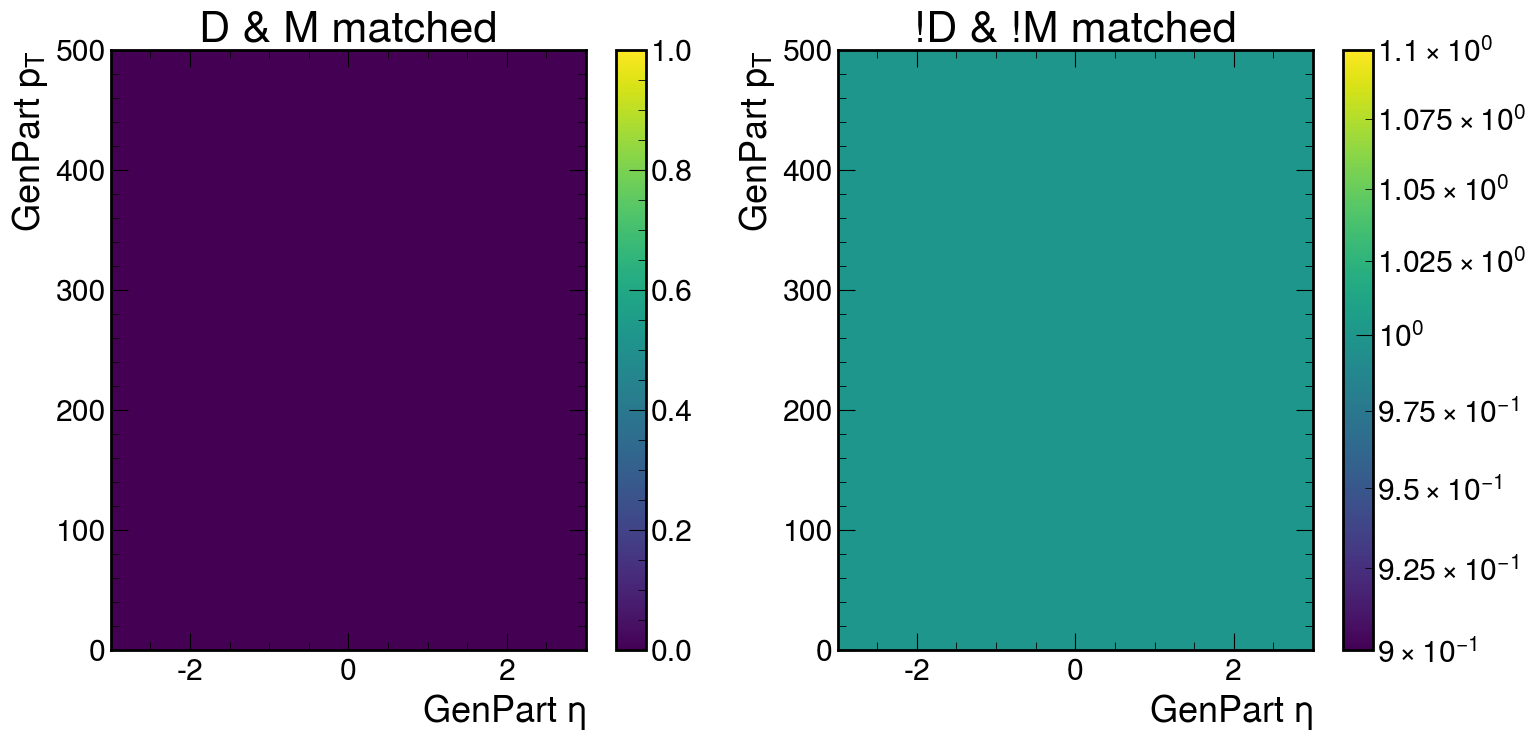

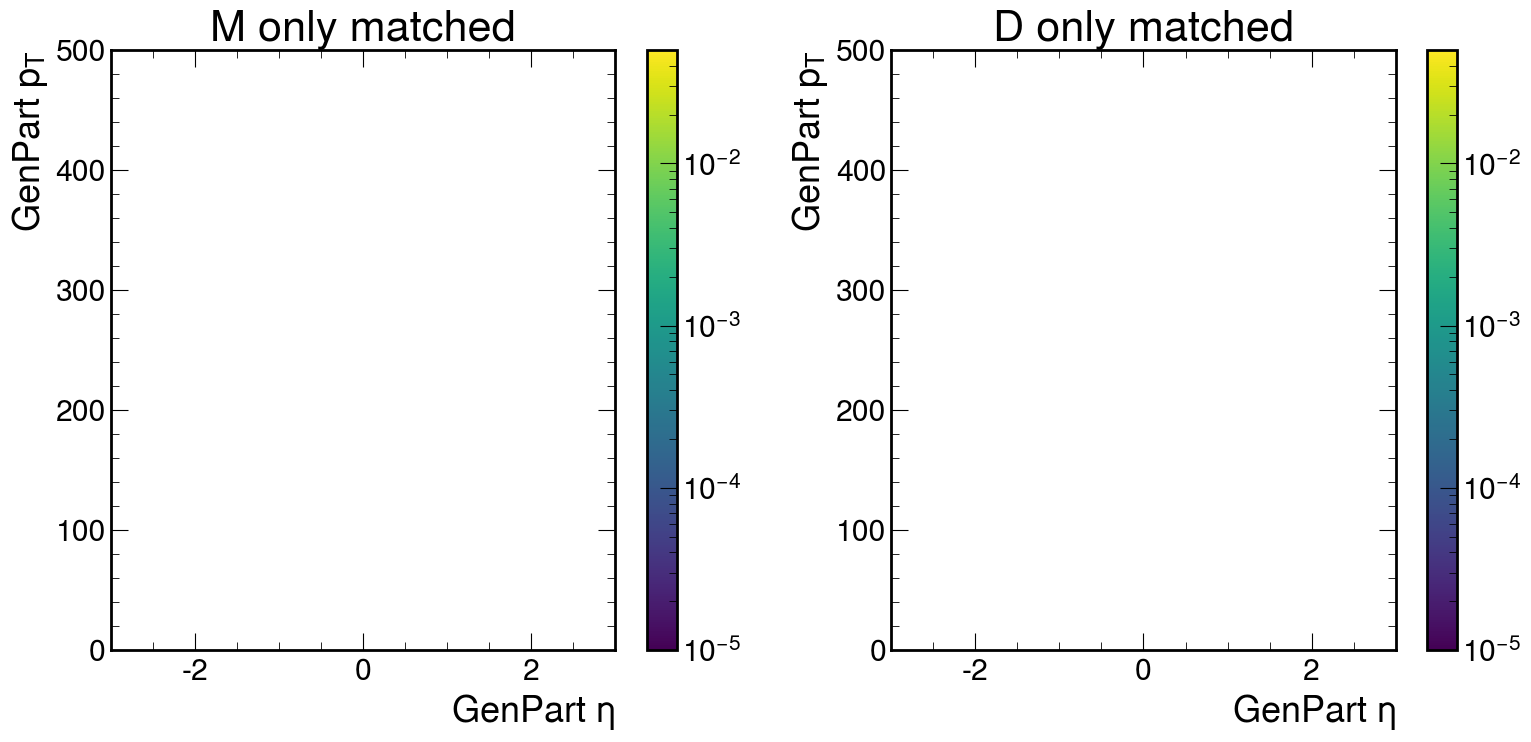

In [64]:
bins = (25, 30)
rrange = ((-3,3),(0,500))


N_matched_both_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)&(dfj.ele_isTrackerDriven_M==1)],
                                            dfj["genpart_pt_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)&(dfj.ele_isTrackerDriven_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.elematched_D==1)&(dfj.elematched_M==0)&(dfj.ele_isTrackerDriven_D==1)],
                                             dfj["genpart_pt_D"][(dfj.elematched_D==1)&(dfj.elematched_M==0)&(dfj.ele_isTrackerDriven_D==1)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(dfj["genpart_eta_M"][(dfj.elematched_D==0)&(dfj.elematched_M==1)&(dfj.ele_isTrackerDriven_M==1)], 
                                            dfj["genpart_pt_M"][(dfj.elematched_D==0)&(dfj.elematched_M==1)&(dfj.ele_isTrackerDriven_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(dfj["genpart_eta_M"][(dfj.elematched_D==0)&(dfj.elematched_M==0)], 
                                                  dfj["genpart_pt_M"][(dfj.elematched_D==0)&(dfj.elematched_M==0)], 
             bins=bins, range=rrange )


N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta

X, Y = np.meshgrid(xbins, ybins)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.tight_layout()

plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.pdf")

fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(16,8))
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-5,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-5,))

ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")

ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax3.set_title("M only matched")
ax4.set_title("D only matched")

plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.pdf")

### Checking the SuperCluster when there is not matching of the patElectron

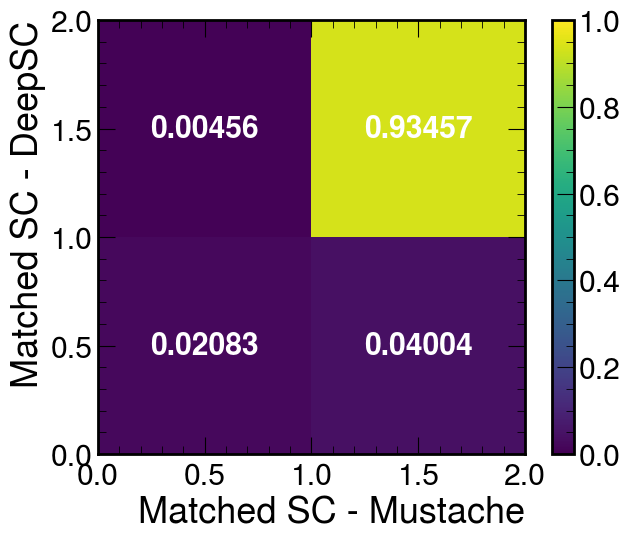

In [56]:
mask_onlyM = (df_join.elematched_D==0)&(df_join.elematched_M==1)

fig = plt.figure(figsize=(7,6))
ax = plt.gca()

hist, xbins, ybins = np.histogram2d(dfj[mask_onlyM].sc_matched_M, dfj[mask_onlyM].sc_matched_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
C = ax.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax)
ax.set_xlabel("Matched SC - Mustache")
ax.set_ylabel("Matched SC - DeepSC")
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_SC_withonlyMustachePatElectronMatched.png")
plt.savefig(f"{output_folder}/Matched_SC_withonlyMustachePatElectronMatched.pdf")

In [ ]:
mask_onlyM = (df_join.elematched_D==0)&(df_join.elematched_M==1)

fig = plt.figure(figsize=(7,6))
ax = plt.gca()

hist, xbins, ybins = np.histogram2d(dfj[mask_onlyM].sc_matched_M, dfj[mask_onlyM].sc_matched_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
C = ax.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax)
ax.set_xlabel("Matched SC - Mustache")
ax.set_ylabel("Matched SC - DeepSC")
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_SC_withonlyMustachePatElectronMatched.png")
plt.savefig(f"{output_folder}/Matched_SC_withonlyMustachePatElectronMatched.pdf")

# Comparison of the SC and seed position

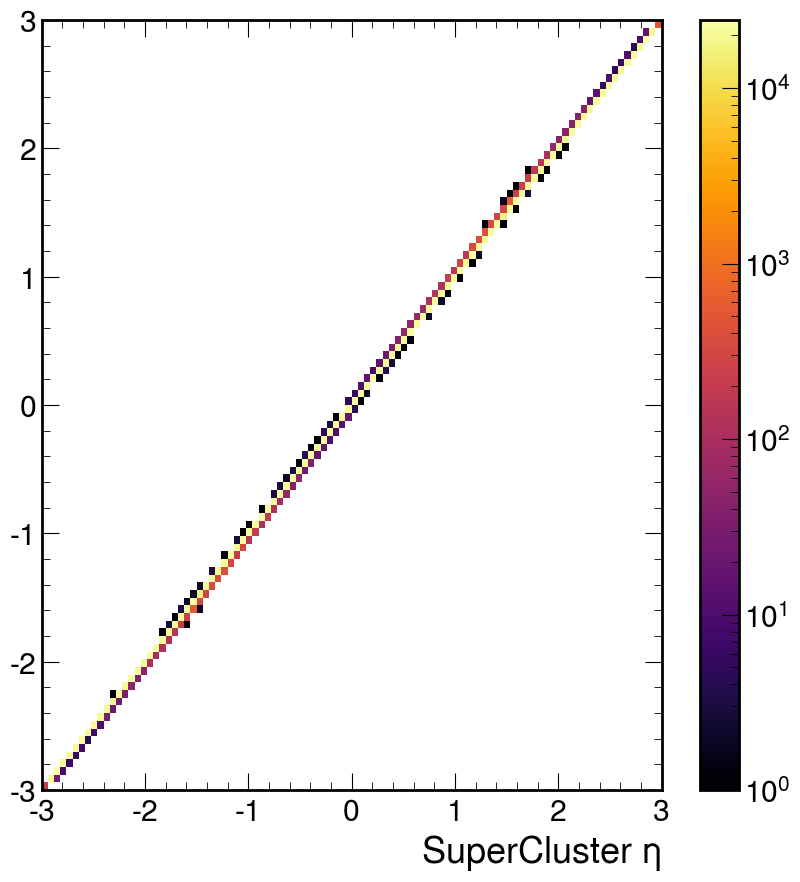

In [53]:
plt.hist2d(dfj.seed_eta_D, 
          dfj.sc_eta_D, 
           bins=100,
          range=((-3,3),(-3,3)),
          norm=LogNorm(), cmap="inferno");
plt.xlabel("Seed $\eta$")
plt.xlabel("SuperCluster $\eta$")
plt.colorbar()
plt.savefig(f"{output_folder}/seed_eta_SC_eta_comparison.png")
plt.savefig(f"{output_folder}/seed_eta_SC_eta_comparison.pdf")

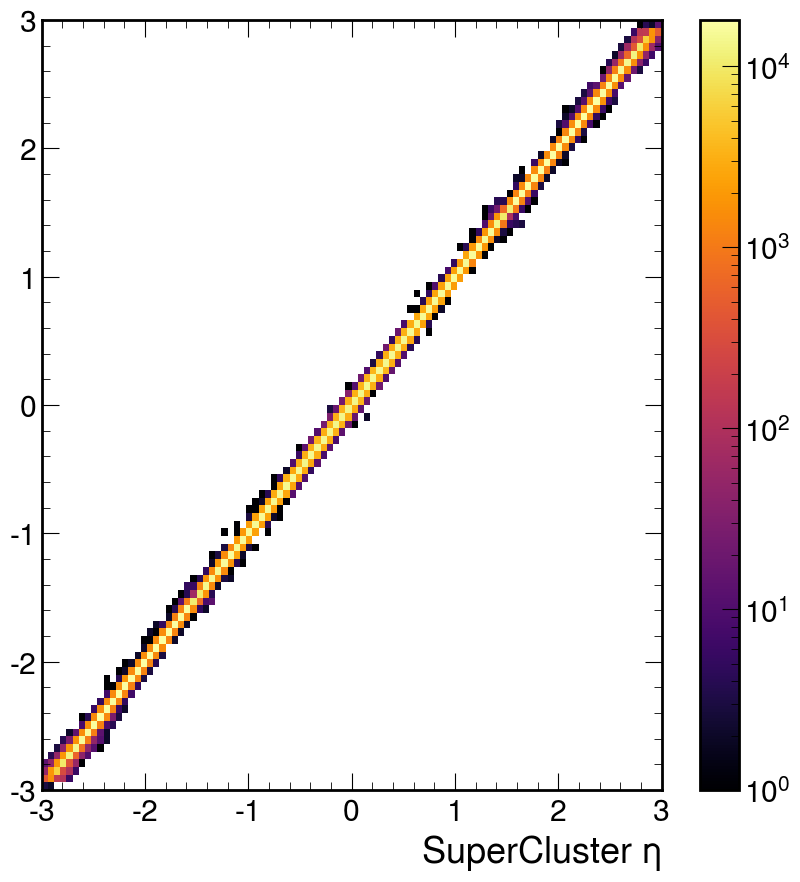

In [52]:
plt.hist2d(dfj.ele_eta_D, 
          dfj.sc_eta_D, 
           bins=100,
          range=((-3,3),(-3,3)),
          norm=LogNorm(), cmap="inferno");
plt.xlabel("Seed $\eta$")
plt.xlabel("SuperCluster $\eta$")
plt.colorbar()
plt.savefig(f"{output_folder}/seed_eta_ele_eta_comparison.png")
plt.savefig(f"{output_folder}/seed_eta_ele_eta_comparison.pdf")